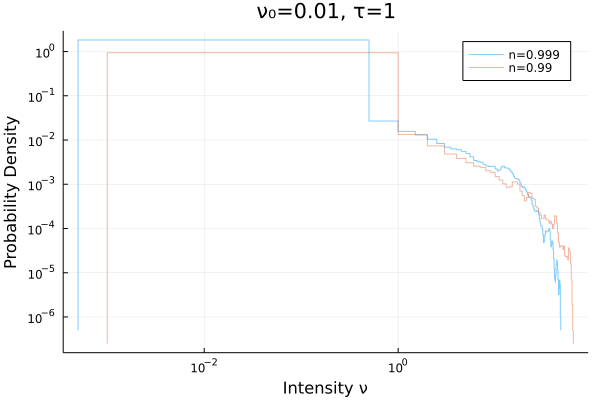

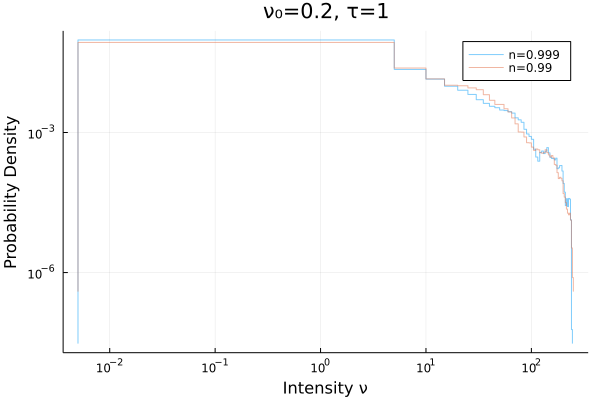

In [25]:
using Plots

# パラメータ
τ = 1.0
dt = 0.001
T = 10000
ν_0_values = [0.01, 0.2]  # 修正前のコードから1.0のケースを除外
n_values = [0.999, 0.99]

# 強度ν(t)の計算関数
function calculate_ν(t, events, n, ν_0, τ)
    threshold = τ * log(100)  # 影響が1%未満になる時間範囲
    ν_t = ν_0
    for event in events
        time_diff = t - event
        if time_diff <= threshold
            ν_t += (1/τ) * exp(-time_diff / τ)
        end
    end
    return ν_t
end

# シミュレーションとグラフのプロット関数
function simulate_and_plot(ν_0, τ, T, dt, n_values)
    p = plot()  # プロットオブジェクトをここで初期化
    for n in n_values
        events = Float64[]
        intensities = Float64[]
        t = 0.0
        while t <= T
            ν_t = calculate_ν(t, events, n, ν_0, τ)
            if rand() < ν_t * dt
                push!(events, t)
            end
            push!(intensities, ν_t)
            t += dt
        end
        
        # intensitiesのデータをpに追加
        histogram!(p, intensities, normed=true, bins=100, label="n=$n", xscale=:log10, yscale=:log10, alpha=0.5)
    end
    title!(p, "ν₀=$ν_0, τ=1")
    xlabel!(p, "Intensity ν")
    ylabel!(p, "Probability Density")
    display(p)  # 修正されたコードでは、この行でpを表示
end

# ν_0=0.01 と ν_0=0.2 の場合に対してシミュレーションを実行
for ν_0 in ν_0_values
    simulate_and_plot(ν_0, τ, T, dt, n_values)
end
